In [1]:
import numpy as np
import csv
import os
import re
import string

In [2]:
# process the lyrics
def process_lyric(lyrics, regex):
    result = []
    
    for word in lyrics:
        word = word.lower()
        word = regex.sub('', word)
        result.append(word)
        
    return(result)

class Lyrics(object):
    def __init__(self, filename='songs.csv'):
        self.name = filename
    
    def __iter__(self):
        with open(self.name, 'r', encoding='UTF-8') as f:
            reader = csv.reader(f)
            header = next(reader)
            
            regex = re.compile('[%s]' % re.escape(string.punctuation))
            
            for row in reader:
                lyrics = process_lyric(row[2].replace("\n","").split(" "), regex)
                lyrics = [word for word in lyrics if word != '']
                yield lyrics
                

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim

text = Lyrics()
model = gensim.models.Word2Vec(text, workers=4, window=5, size=100, min_count=2)
model.save('wordTovector.model')
print("finish")

finish


In [4]:
import pickle

def matrixize(lyrics):
    matrix = []
    
    for word in lyrics:
        if word in model.wv.vocab:
            matrix.append(np.ndarray.tolist(model.wv.__getitem__(word)))
            
    return matrix

def write_file(filename, data):
     with open("matrix_Folder/" + filename, "wb") as f:
        pickle.dump(data, f)
        

#  read songs.csv, process lyrics, word2vector the lyrics of each song and write them to files
def wordToVector(filename):
    with open(filename, 'r', encoding='UTF-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        
        regex = re.compile('[%s]' % re.escape(string.punctuation))
        count = 0
        for row in reader:
            lyrics = process_lyric(row[2].replace("\n","").split(" "), regex)
            lyrics = [word for word in lyrics if word != '']
            
            matrix = matrixize(lyrics)
            write_name = "matrix" + str(count) + ".txt"
            write_file(write_name, matrix)
            
            count += 1


wordToVector("songs.csv")
print("finish")

finish


===== Analyze the distribution of the lyric length, to find a proper paddding size=====

In [5]:
path="matrix_Folder/matrix"
        
count_list = []
for i in range(25000):
    file_name = path + str(i) + ".txt"
    with open(file_name, 'rb') as f:
        lyric = pickle.load(f)
        count_list.append(len(lyric))
        
print("finish")

finish


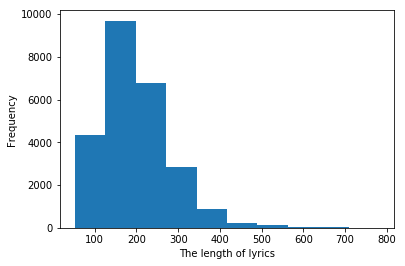

In [7]:
# To find a proper padding size
# Plot the frequency of songs according to their lyrics length.

import matplotlib.pyplot as plt
# print(count_list)
plt.hist(count_list)

plt.xlabel('The length of lyrics')
plt.ylabel('Frequency')
plt.savefig('padding.png')
plt.show()

So set the padding_size = 500, which will be used in the train.ipynb